# Este notebook se lo usa para calcular la importancia de cada uno de los features segun el metodo de random forest:

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [3]:
train = pd.read_csv('featuresTrain3.csv')
test = pd.read_csv('featuresTest3.csv')

In [4]:
X, y = train[train.columns.drop(['id','ciudad','provincia','precio'])], train['precio']

In [5]:
forest_model = RandomForestRegressor(random_state=1)

In [6]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,anio,...,peso_IDF_titulo,metrosdescubiertos,tipodepropiedad_cb,caracteristicas_cb,provincia_cb,piscina,gimnasio,usosmultiples,escuelascercanas,centroscomercialescercanos
0,2.210044,2.0,1.0,2.0,4.394449,4.394449,23533.0,20.696818,-99.509221,2015.0,...,0.000000,0.000000,0.478679,0.390827,0.413880,0.0,0.0,0.0,0.0,0.0
1,2.397895,3.0,2.0,2.0,5.594711,5.198497,24514.0,19.310205,-99.227655,2013.0,...,0.165371,0.000000,0.386072,0.475439,0.413880,0.0,0.0,0.0,1.0,1.0
2,1.791759,3.0,2.0,2.0,4.976734,5.117994,48551.0,20.696818,-99.509221,2015.0,...,0.033601,3.135494,0.426561,0.390827,0.407525,0.0,0.0,0.0,0.0,0.0
3,0.693147,2.0,1.0,1.0,4.158883,4.219508,53666.0,19.301890,-99.688015,2012.0,...,0.033601,1.609438,0.426561,0.475439,0.420146,0.0,0.0,0.0,1.0,1.0
4,2.397895,2.0,1.0,1.0,4.564348,4.564348,47835.0,20.696818,-99.509221,2016.0,...,0.000000,0.000000,0.478679,0.390827,0.407525,0.0,0.0,0.0,0.0,0.0


In [7]:
forest_model.fit(X, y)

/home/alfonso/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [8]:
importancias = forest_model.feature_importances_
columnas = X.columns

In [9]:
df_importancias = pd.DataFrame({'features': columnas, 'peso': importancias})

In [10]:
# la imporcacia de cada feature es la siguiente:
df_importancias

,features,peso
0,antiguedad,0.024558
1,habitaciones,0.021257
2,garages,0.017791
3,banos,0.046896
4,metroscubiertos,0.368228
5,metrostotales,0.062821
6,idzona,0.071894
7,lat,0.019661
8,lng,0.023043
9,anio,0.025418


Text(0.5, 1.0, '10 features mas importantes y sus pesos')

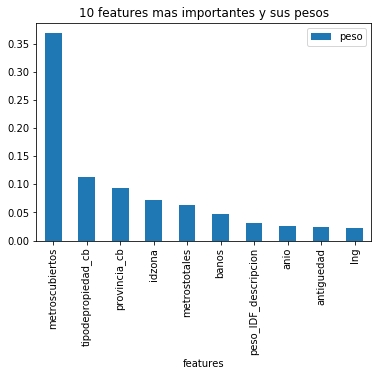

In [18]:
# los 10 features mas importantes:
ax = df_importancias.nlargest(10,'peso').plot.bar(x='features',y='peso', rot=90)
plt.title('10 features mas importantes y sus pesos')

Text(0.5, 1.0, '10 features menos importantes y sus pesos')

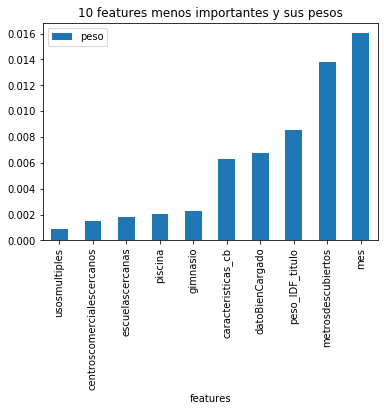

In [19]:
# los 10 features menos importantes:
ax = df_importancias.nsmallest(10,'peso').plot.bar(x='features',y='peso', rot=90)
plt.title('10 features menos importantes y sus pesos')